In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("/home/apprenant/american_dream_db/Data/02_intermediate/salary_survey_cleaned.csv")
del df1["Unnamed: 0"]
df1.head()

,salary,location,postal_code,job_title,employment_status,manage_staff,experience,nb_companies,team_size,company_employees,hours_per_week,largest_city,sector,lf_job,career_plans,gender
0,115000,United States,00000,DBA,Full time employee,No,5,1,2,Not Asked,40,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male
1,100000,United States,00000,Developer,Full time employee,No,6,1,6,Not Asked,40,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male
2,70000,United States,94133,Analyst,Full time employee,No,3,1,2,Not Asked,40,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male
3,110000,United States,95354,DBA,Full time employee,No,25,3,0,Not Asked,40,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male
4,79500,United States,78727,Analyst,Full time employee,No,2,1,0,Not Asked,40,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male


## 1. Salaire moyen, salaire médian et déciles

In [2]:
average_salary = round(df1['salary'].mean())
median_salary = round(df1['salary'].median())

print('Le salaire moyen est de {} USD'.format(average_salary))
print('Le salaire médian est de {} USD'.format(median_salary))

Le salaire moyen est de 107786 USD
Le salaire médian est de 103000 USD


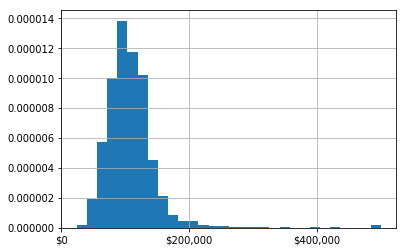

In [3]:
import matplotlib.ticker as mtick
# sous la forme d'histogramme
ax=df1["salary"].hist(density=True,bins=30)

# on change le format de l'axe x
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

# On modifie le nombre de valeur affichézs sur les axes x et y
ax.locator_params(axis="x", nbins=3)
ax.locator_params(axis="y", nbins=10)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


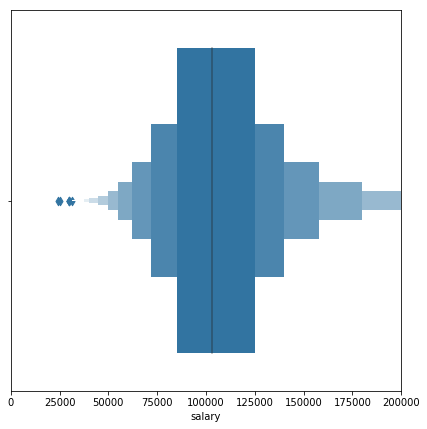

In [4]:
plt.figure(figsize = (7,7))
plt.xlim(0,200000)
sns.boxenplot(x = df1["salary"])

## 2. Salaire moyen en fonction du job title

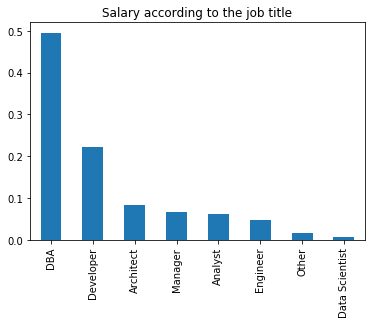

In [26]:
df1["job_title"].value_counts(normalize=True).plot(kind='bar')
plt.title('Salary according to the job title')
plt.show()

<Figure size 1152x576 with 0 Axes>

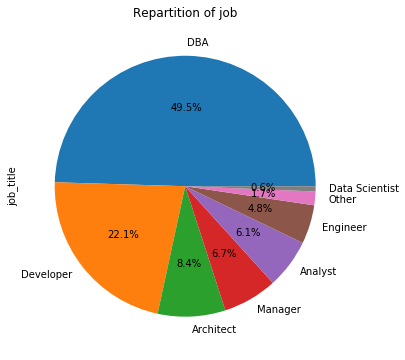

<Figure size 1152x576 with 0 Axes>

In [6]:
# job title distribution
fig, axes = plt.subplots(figsize=(6,6))
plt.title('Repartition of job')
df1['job_title'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%',)
plt.figure(figsize=(16,8))

## 3. Travailler pour une seule ou plusieurs sociétés ?

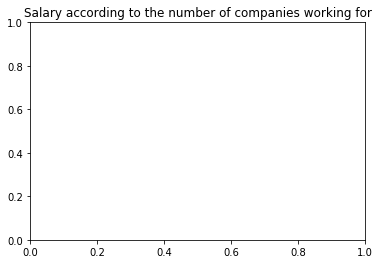

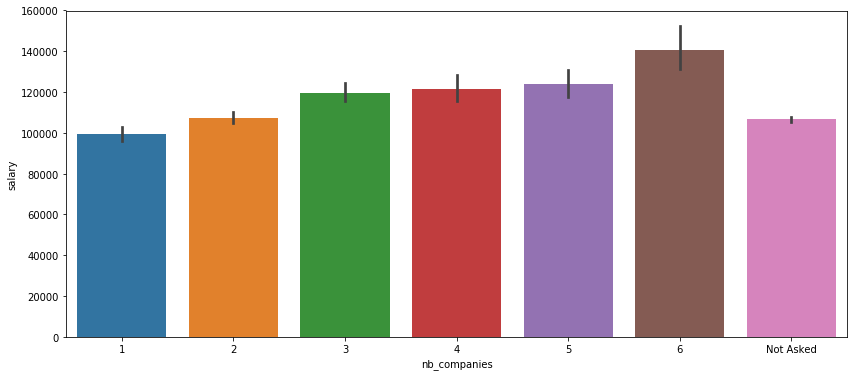

In [7]:
nb_companies_order = ['1', '2', '3', '4', '5', '6', 'Not Asked']
plt.title('Salary according to the number of companies working for')
plt.figure(figsize=(14,6))
sns.barplot(x = df1['nb_companies'], y = df1['salary'], order = nb_companies_order)

On remarque que le salaire augmente à mesure que le nombre de société dans lequel travail un professionnel augmente. Il est donc conseillé de travailler pour plusieurs sociétés afin d'avoir un meilleur salaire.

## 4. Le nombre de personnes dans l'équipe influence-t-il le salaire ?

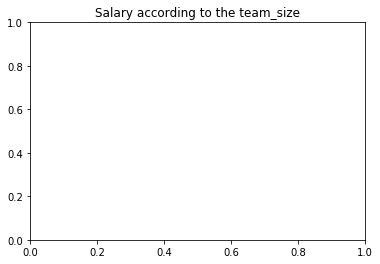

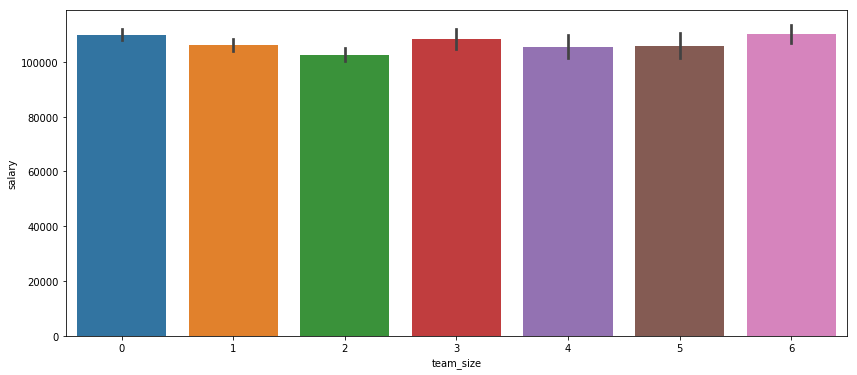

In [8]:
team_size_order = [0, 1, 2, 3, 4, 5, 6]
plt.title('Salary according to the team_size')
plt.figure(figsize=(14,6))
sns.barplot(x = df1['team_size'], y = df1['salary'], order = team_size_order)

Le nombre de salarié dans l'équipe n'a aucune influence sur le salaire obtenu.

## 5. Le nombre d'année d'expérience a-t-il une influence ?

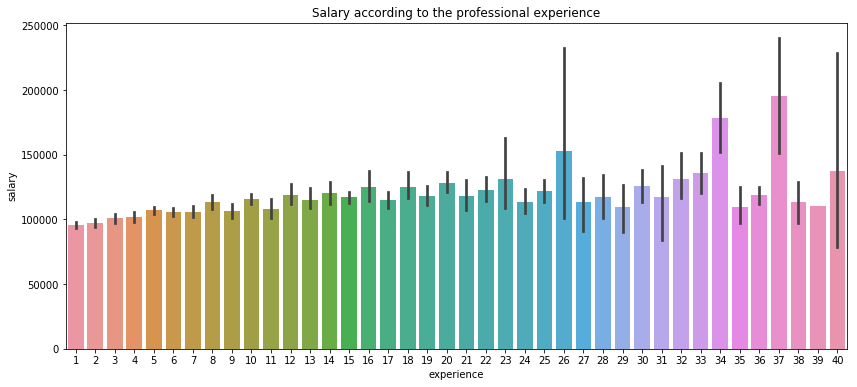

In [9]:
plt.figure(figsize=(14,6))
plt.title('Salary according to the professional experience')
sns.barplot(x = df1['experience'], y = df1['salary'])

Le nombre d'années d'expérience a une influence sur le salaire moyen gagné. Plus l'expérience est importante et plus le salaire l'est.

## 6. Une inégalité salariale entre hommes et femmes ?

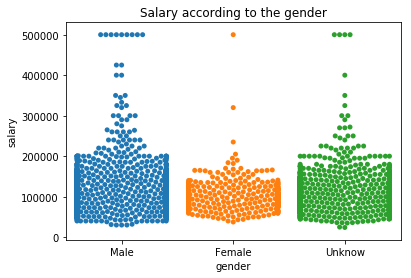

In [10]:
plt.title('Salary according to the gender')
sns.swarmplot(x=df1['gender'], y=df1['salary'])

Il existe bien une inégalité salariale entre hommes et femmes car les femmes sont globalement situées dans des tranches de salaires inférieures par rapport aux hommes.

## 7. Comment s'explique cette inégalité salariale ?

In [11]:
df1['count'] = 1
df1.groupby(['job_title', 'gender']).sum()

salary  experience  team_size  hours_per_week  count
job_title      gender                                                         
Analyst        Female    2673500         169         56            1375     34
               Male     17894327        1128        455            9293    224
               Unknow    7069641         537        137            3544     84
Architect      Female    3365855         133         42            1044     25
               Male     36911866        2386        279           11632    267
               Unknow   23717236        1090        201            7995    176
DBA            Female   24368267        2354        393           10213    237
               Male    167024387       13083       2517           65746   1547
               Unknow  101481003        7768       1648           43322    984
Data Scientist Female     368600          10          1             130      3
               Male      2768500         119         45            1025     24
               Unknow    1236493          48          8             393      9
Developer      Female    9495473         776        181            4289    102
               Male     77843183        5922       1557           31345    741
               Unknow   38273320        2904        762           16778    392
Engineer       Female    1544230          89         28             591     14
               Male     17224577        1182        323            6548    151
               Unknow   11912391         771        238            4587    104
Manager        Female    2746080         137         27             913     21
               Male     31286880        1667        287           11001    244
               Unknow   14040926         773        104            5260    112
Other          Female     473000          25         24             246      6
               Male      4501317         438         81            2084     49
               Unknow    4302575         388         60            1867     40

L'inégalité salariale s'explique par deux phénomènes : 
- une sous-représentation des femmes dans les métiers les mieux payés (par exemple, manager)
- un salaire moins important à poste et à expérience égal

## 8. Une différence d'évolution salariale liée à l'expérience ?

In [12]:
df1.loc[(df1.salary <= 100000) & (df1.job_title == 'Manager') & (df1.experience < 10) & (df1.gender != 'Unknow')].sort_values(by ='experience')

,salary,location,postal_code,job_title,employment_status,manage_staff,experience,nb_companies,team_size,company_employees,hours_per_week,largest_city,sector,lf_job,career_plans,gender,count
3515,92000,United States,00000,Manager,Full time employee,Yes,1,Not Asked,5,Not Asked,50,Not Asked,Private business,"Yes, but only passively (just curious)","Stay with the same role, but change employers",Male,1
2917,100000,United States,00000,Manager,Full time employee,Yes,1,Not Asked,0,Not Asked,40,Not Asked,Private business,"Yes, but only passively (just curious)","Stay with the same employer, same role",Male,1
2336,67000,United States,38004,Manager,Full time employee of a consulting/contracting...,Yes,1,Not Asked,0,Not Asked,45,Not Asked,Private business,"Yes, but only passively (just curious)","Stay with the same employer, but change roles",Male,1
2299,86000,United States,45342,Manager,Full time employee,Yes,1,Not Asked,0,Not Asked,50,Not Asked,Private business,No,"Stay with the same employer, same role",Male,1
3360,95200,United States,65203,Manager,Full time employee,Yes,1,Not Asked,0,Not Asked,45,Not Asked,Private business,No,"Stay with the same employer, same role",Male,1
1928,90000,United States,92677,Manager,Full time employee,Yes,1,Not Asked,0,Not Asked,42,Not Asked,Private business,No,"Stay with the same employer, same role",Female,1
1380,90000,United States,60523,Manager,Full time employee,Yes,1,1,0,500-999,50,1M+ (metropolis),Private business,No,"Stay with the same employer, same role",Male,1
1177,85000,United States,73162,Manager,Full time employee,Yes,1,5,0,100-249,55,300K-1M (large city),State/province government,No,"Stay with the same employer, same role",Male,1
2711,90000,United States,29607,Manager,Full time employee,Yes,1,Not Asked,0,Not Asked,60,Not Asked,Private business,No,"Stay with the same employer, but change roles",Male,1
167,57000,United States,18960,Manager,Full time employee,No,1,1,0,Not Asked,40,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,1


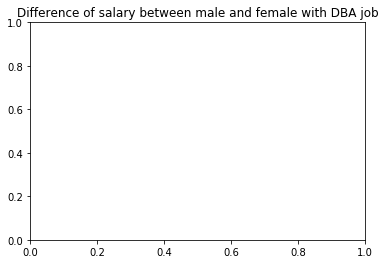

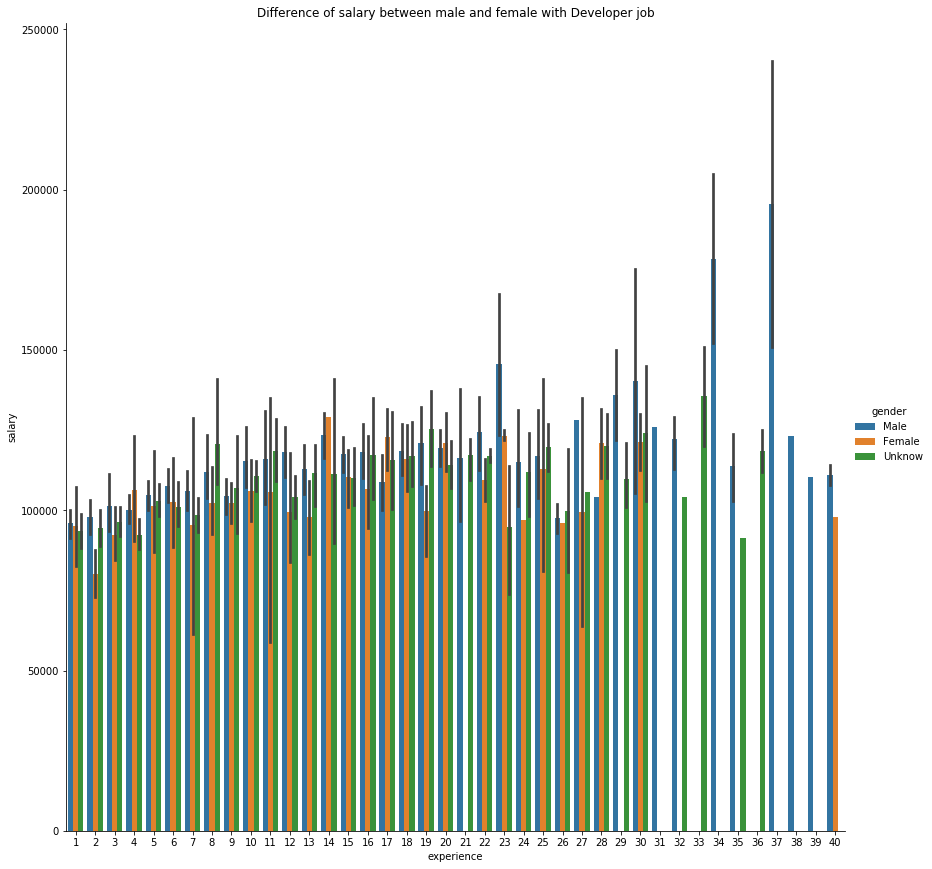

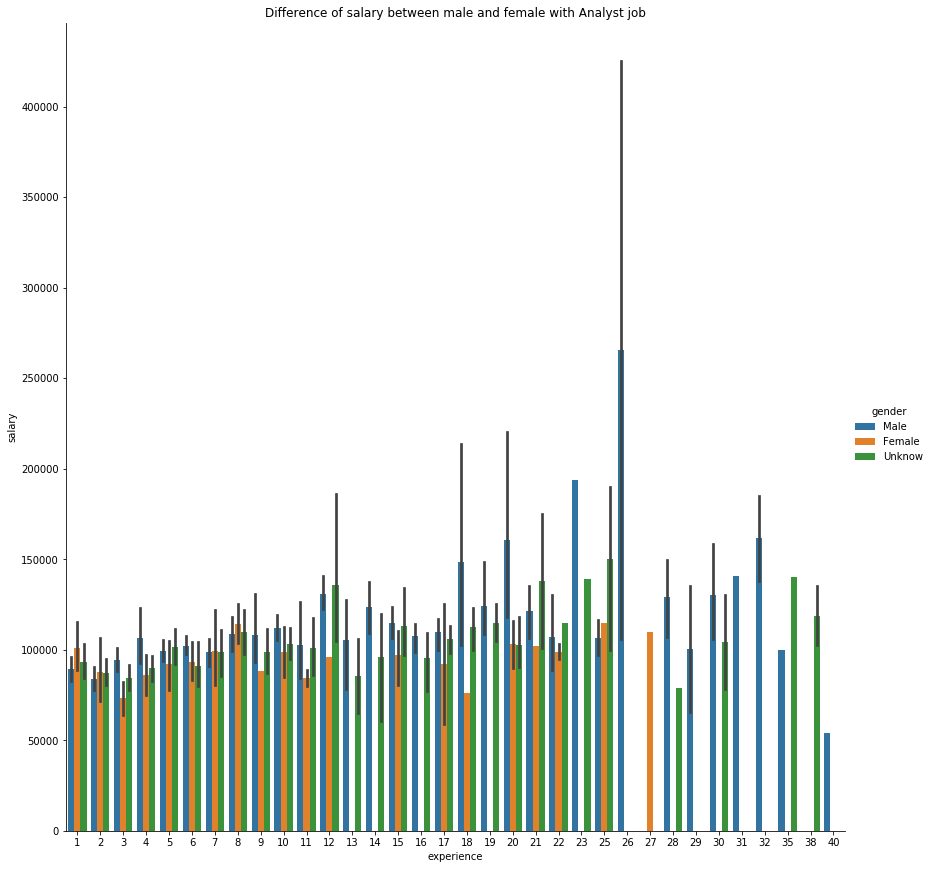

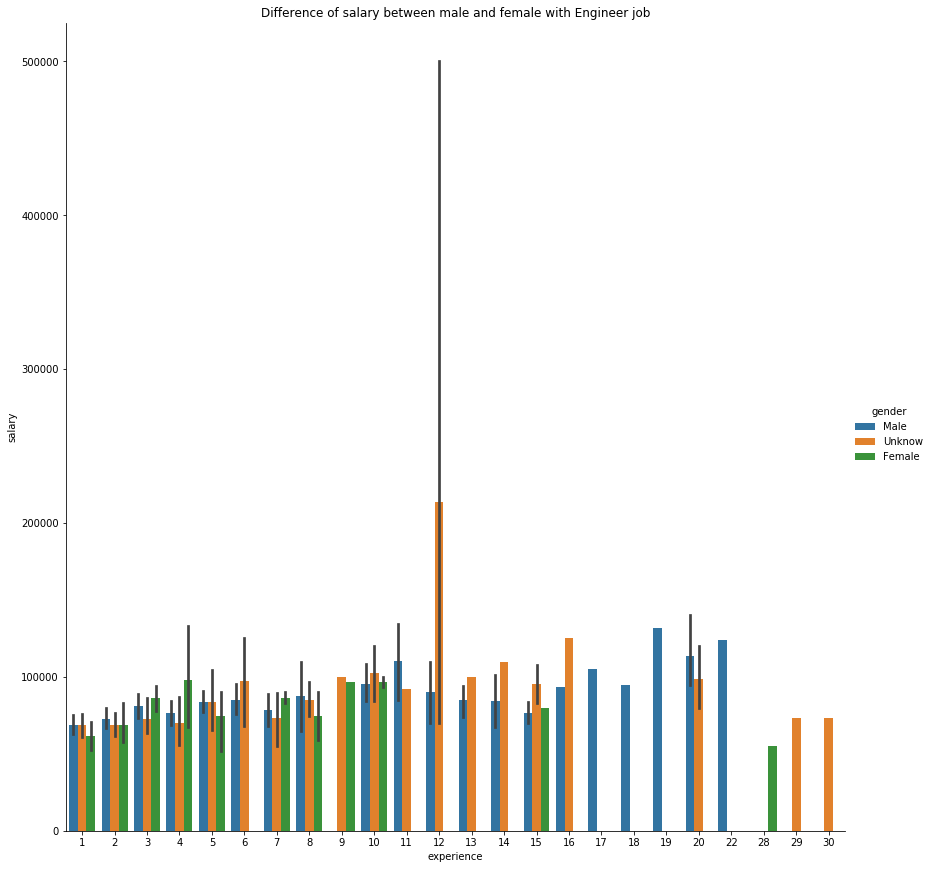

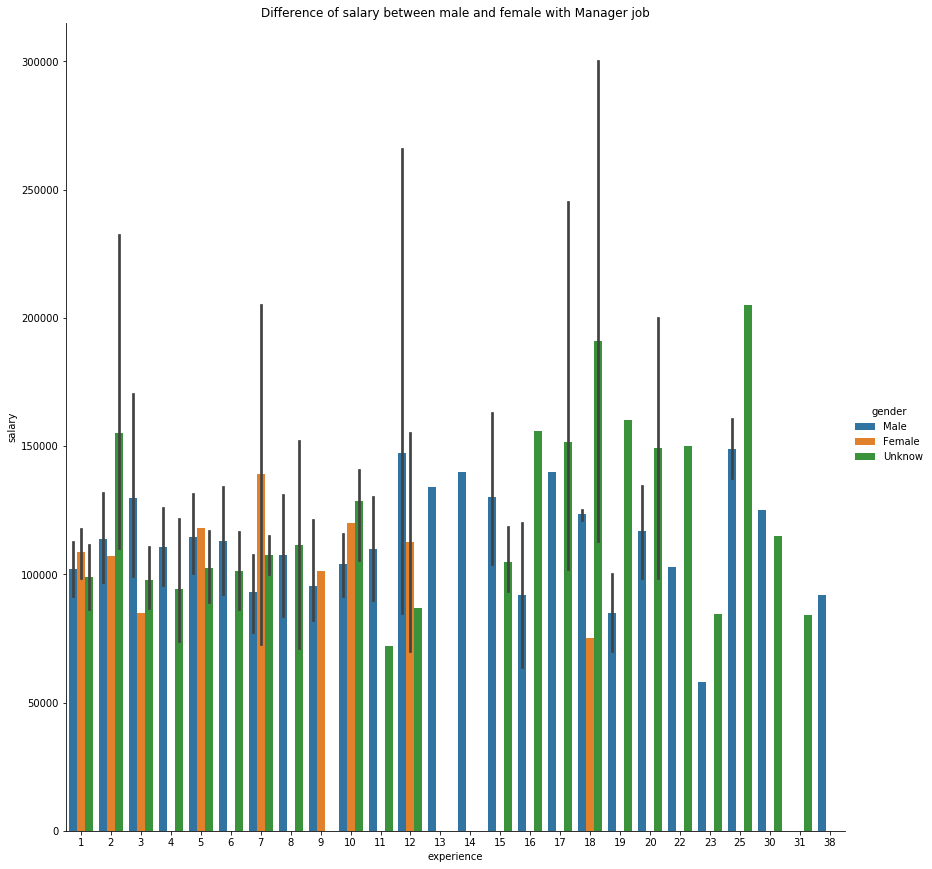

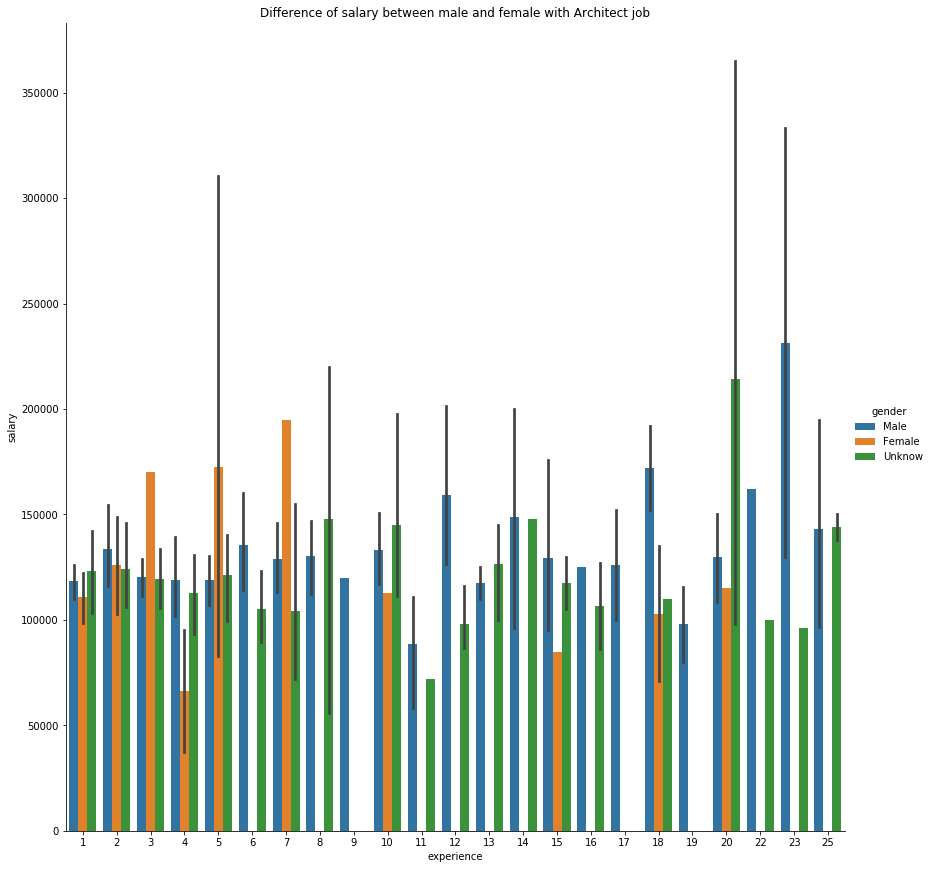

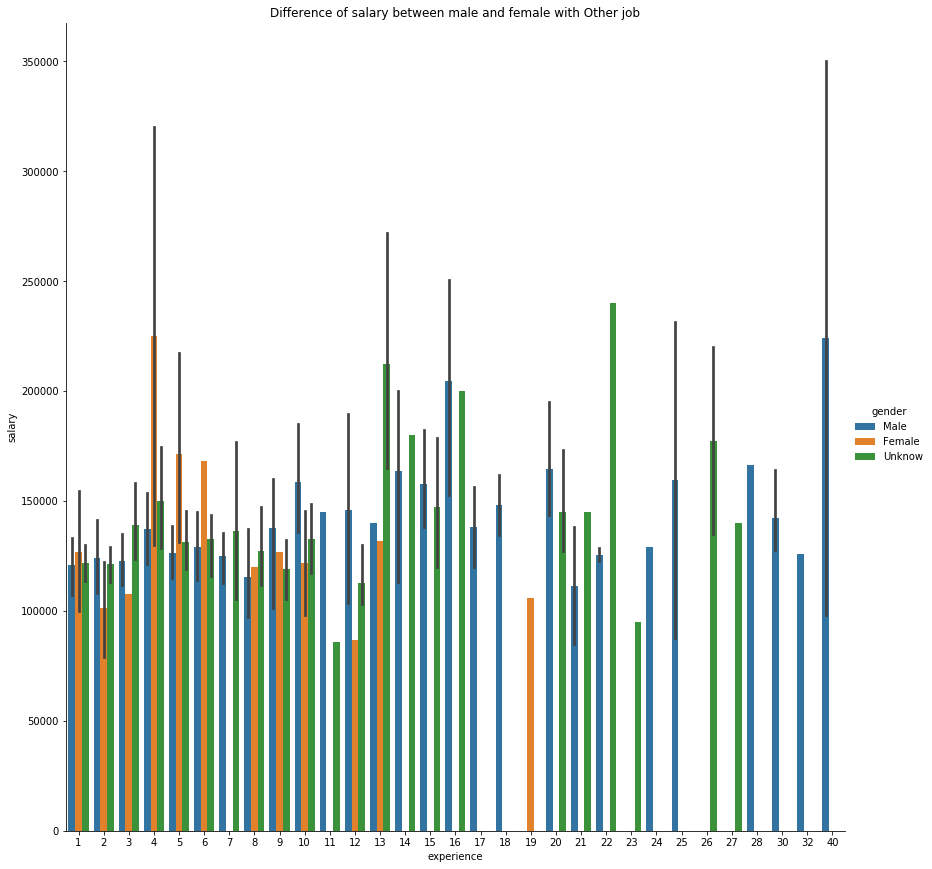

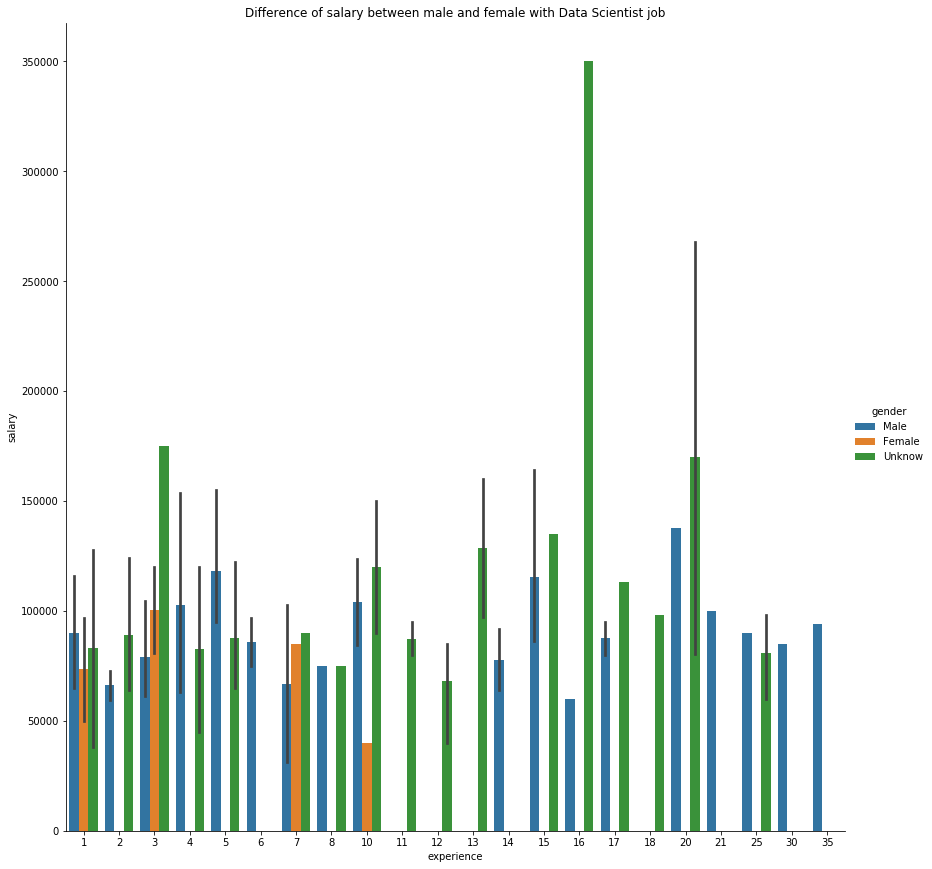

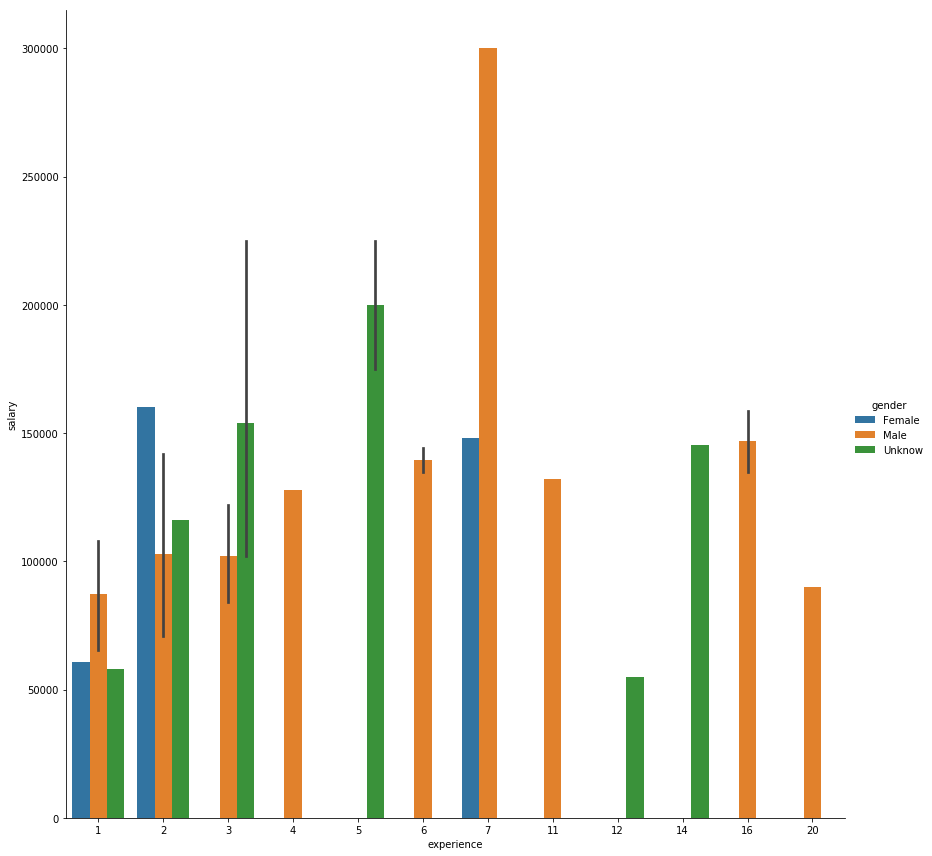

In [24]:
for job in df1['job_title'].unique():
    plt.title('Difference of salary between male and female with {} job'.format(job))
    sns.catplot(x="experience", y="salary",hue="gender", kind="bar", data=df1.loc[df1['job_title'] == job], height = 12)

Comme on peut le voir sur les diagrammes en barre ci-dessus, les hommes sont globalement mieux rémunérés que les femmes à expérience égale sur un même poste. On remarque d'ailleurs que cet écart se creuse à mesure que les années d'expérience augmente.

## 9. Quel plan de carrière pour conquérir le rêve américain ?

Pour résumé, une manière de maximiser son salaire est de réunir l'ensemble de ces paramètres :
- être un homme  
- travailler pour plus de 5 sociétés
- être expérimenté dans le poste que l'on vise  
- viser plutôt un poste de DBA